In [50]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

KNN Regression

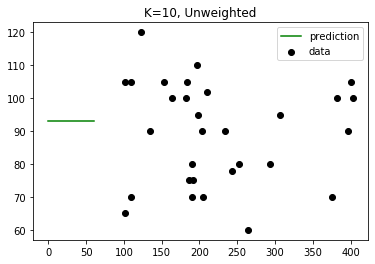

In [51]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = pd.DataFrame( music['duration'])
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 60, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

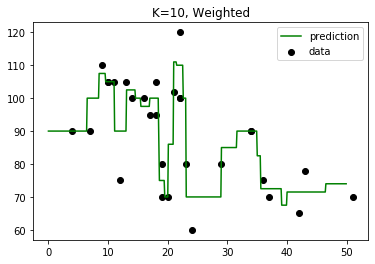

In [52]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=2,  weights='uniform')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

it seems like the weighted model grossly overfits to points

Validating KNN

In [53]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.28 (+/- 1.20)
Weighted Accuracy: -0.40 (+/- 2.22)


two models are fantastically awful
doesn't seem to be much of a relationship. It's all very poor.
increased variance in the weighted model is interesting

Why don't you add the other feature and mess around with  𝑘  and weighting to see if you can do any better than we've done so far?

In [54]:
#Validation:
#importing modules
from sklearn.model_selection import GridSearchCV
#making the instance
knn = neighbors.KNeighborsRegressor(n_jobs=-1)
model = knn
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X,Y)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)


/Users/Top-Secret/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'distance'}


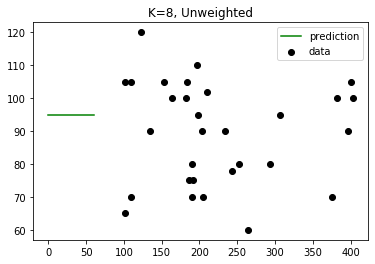

In [55]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=8)
X = pd.DataFrame( music['duration'])
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 60, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=8, Unweighted')
plt.show()

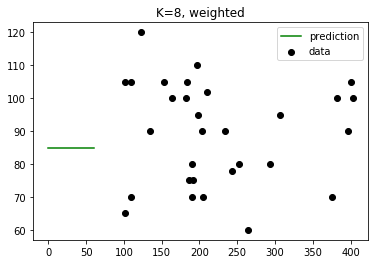

In [56]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=8, weights = 'distance')
X = pd.DataFrame( music['duration'])
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 60, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=8, weighted')
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=8)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=8)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.59 (+/- 1.48)
Weighted Accuracy: -0.84 (+/- 1.52)


OBS:
higher accuracy but negative, lower variance than before when increasing k.

Adding new features and different k:

In [58]:

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=20)
X = music[['duration', 'loudness']]
Y = music.bpm
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [59]:
from sklearn import neighbors

# Build our model.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=20, weights = 'distance')
X = music[['duration', 'loudness']]
Y = music.bpm
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='distance')

In [60]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.32 (+/- 0.59)
Weighted Accuracy: -0.23 (+/- 0.60)


In [66]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=24)
X = music[['duration', 'loudness']]
Y = music.bpm
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                    weights='uniform')

In [65]:
# Build our model.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=24, weights = 'distance')
X = music[['duration', 'loudness']]
Y = music.bpm
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                    weights='distance')

In [70]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.28 (+/- 0.47)
Weighted Accuracy: -0.22 (+/- 0.59)


In [71]:
knn = neighbors.KNeighborsRegressor(n_neighbors=8)
X = music[['duration', 'loudness']]
Y = music.bpm
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [72]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=8, weights = 'distance')
X = music[['duration', 'loudness']]
Y = music.bpm
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='distance')

In [73]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.49 (+/- 0.79)
Weighted Accuracy: -0.30 (+/- 0.80)
